In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session

config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

from experiment_mnist import *

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 13)                10205     
_________________________________________________________________
dense_2 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_3 (Dense)              (None, 11)                143       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                120       
Total params: 10,636
Trainable params: 10,636
Non-trainable params: 0
_________________________________________________________________


100%|██████████| 1000/1000 [05:32<00:00,  3.06it/s]


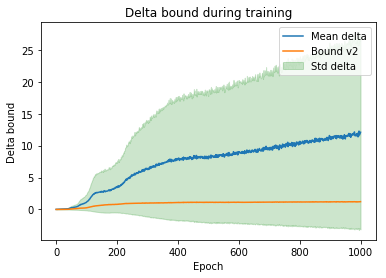

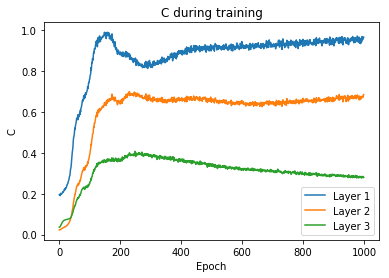

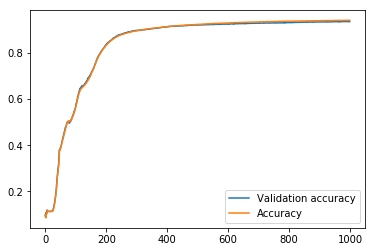

Creating network for 784-dimensional input and 10-dimensional output, with 3 hidden layers


In [2]:
exp = MNISTExperiment([13, 12, 11], [0.1, 0.2, 0.3], 1, epochs = 1000, activation = 'relu', reg_type = 'delta_network', reg_coeff = 0.001, do_print = True)

In [3]:
exp.update_C_train(1000)

In [4]:
assert np.allclose(exp.get_mean_error_v2(), K.get_value(exp.errors[3]).reshape(-1)), "Bound"